In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

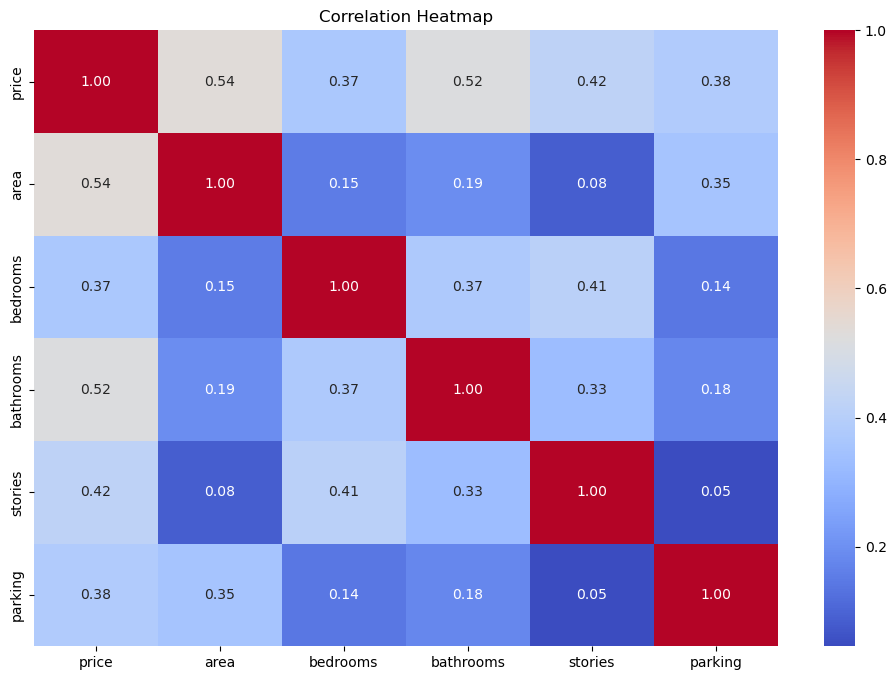

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

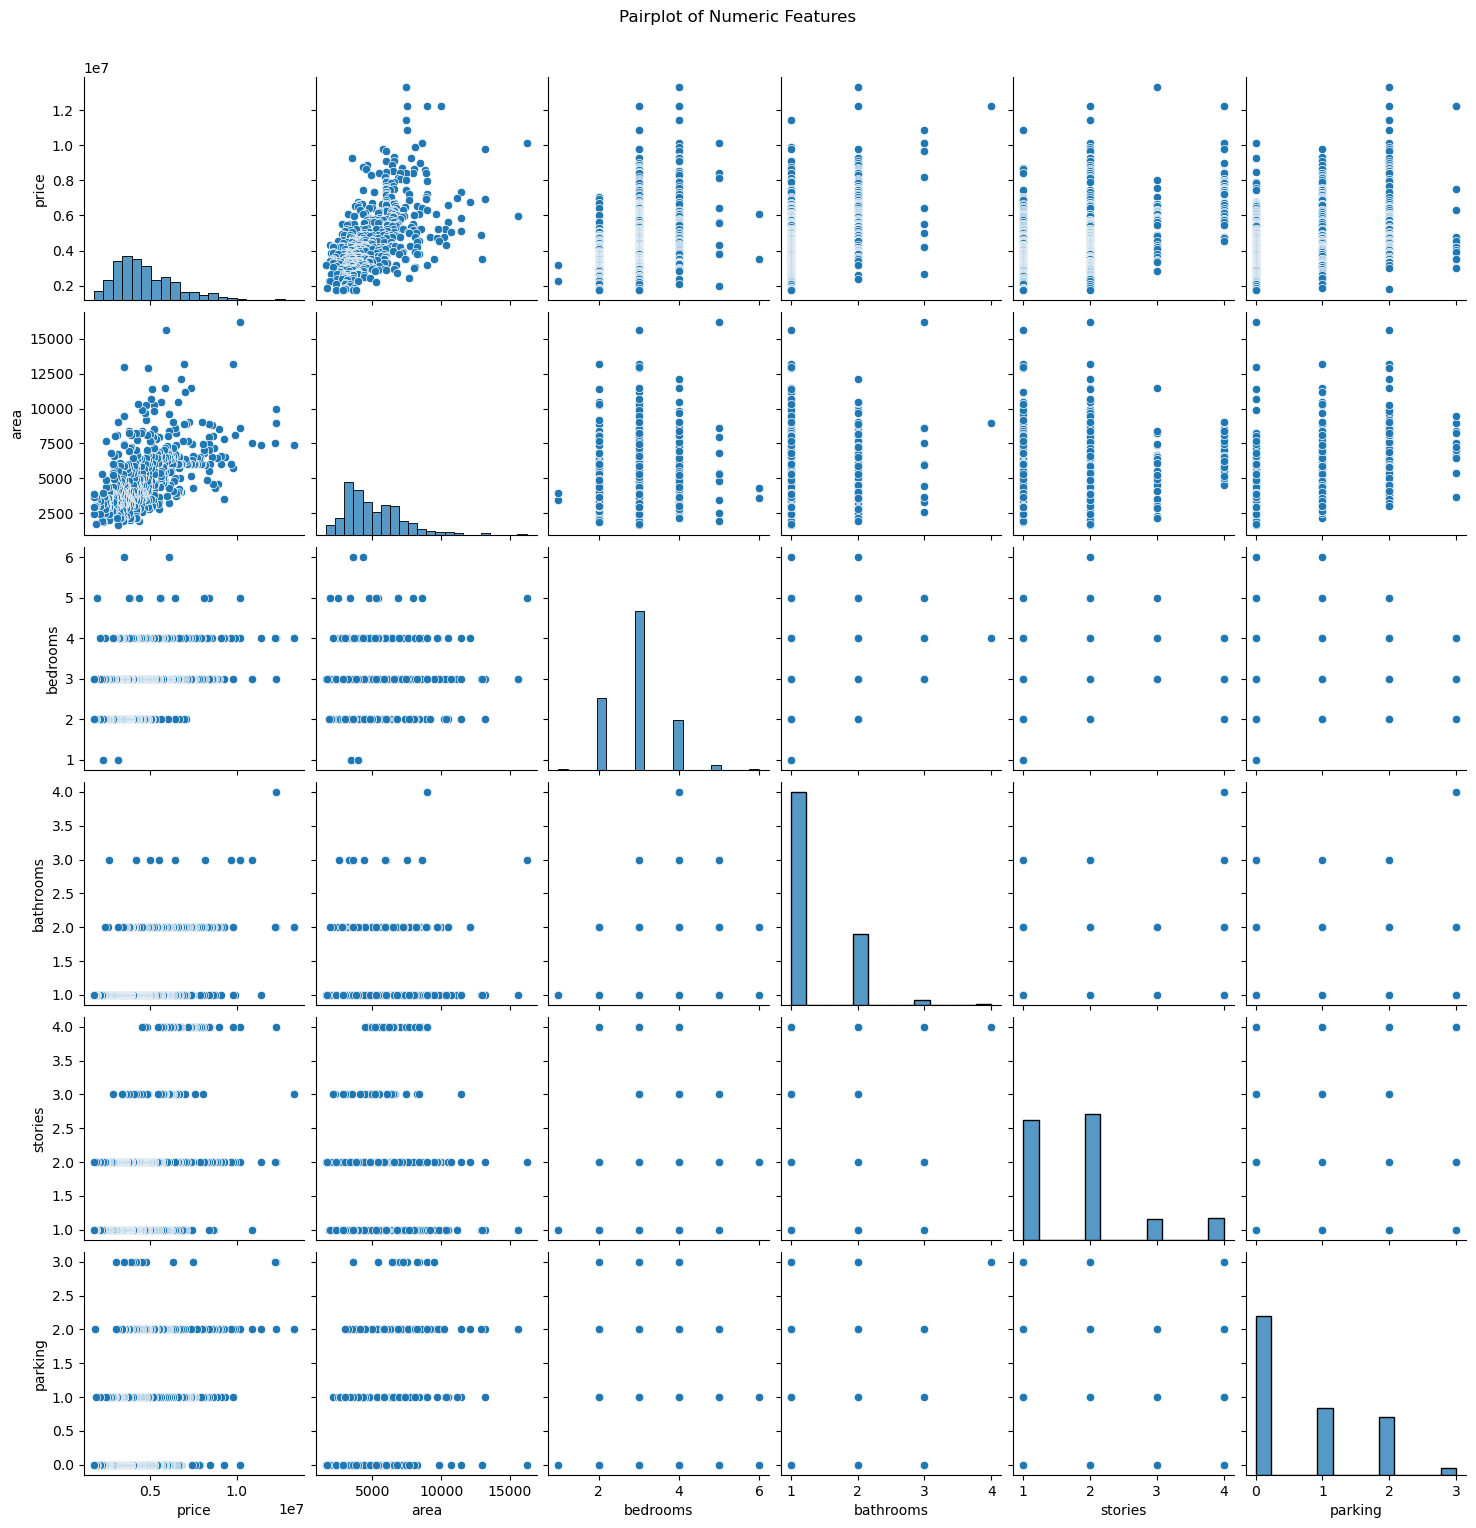

In [6]:
# Pairplot to visualize relationships
sns.pairplot(data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

In [7]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    data[column] = label_encoder.fit_transform(data[column])

In [8]:
# Separating features and target variable
X = data.drop(columns=['price'])
y = data['price']

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Model Training
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predicting on test data
y_pred = linear_model.predict(X_test)

In [12]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 1771751116594.0344
R-squared Score: 0.6494754192267804


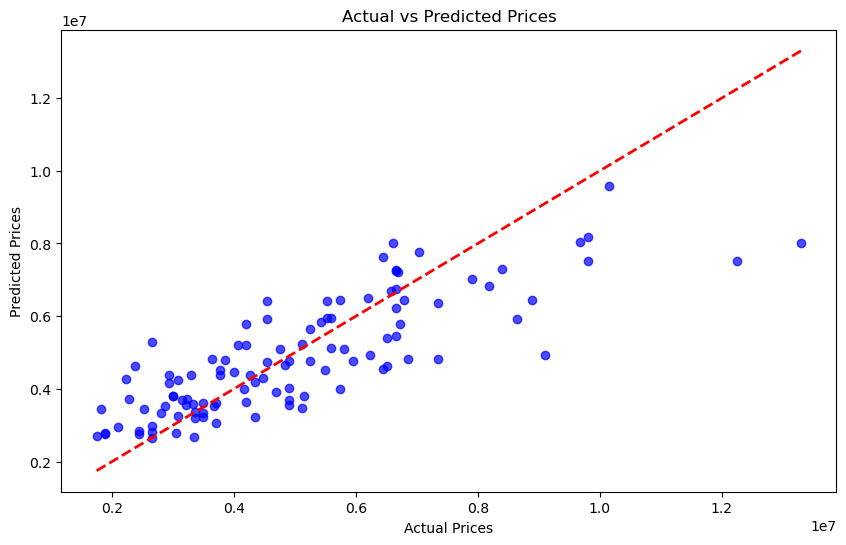

In [14]:
# Visualization of Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

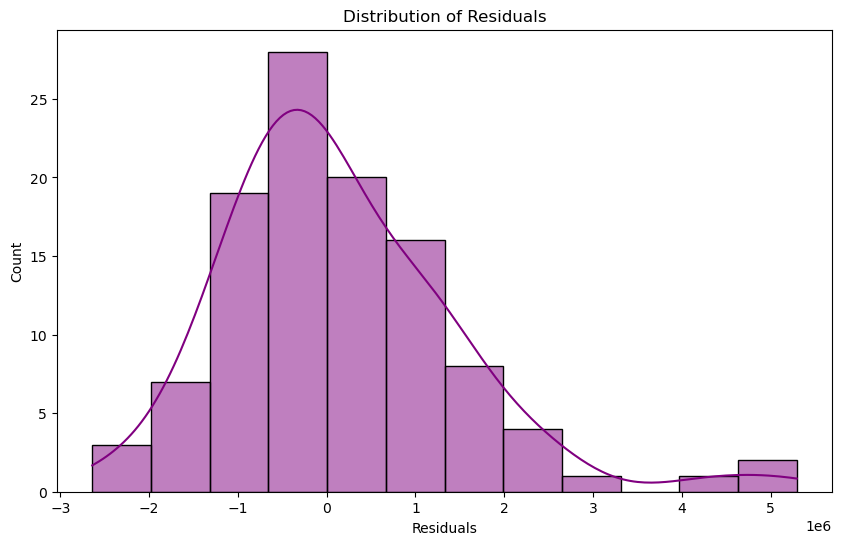

In [15]:
# Residual Plot to check distribution of errors
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

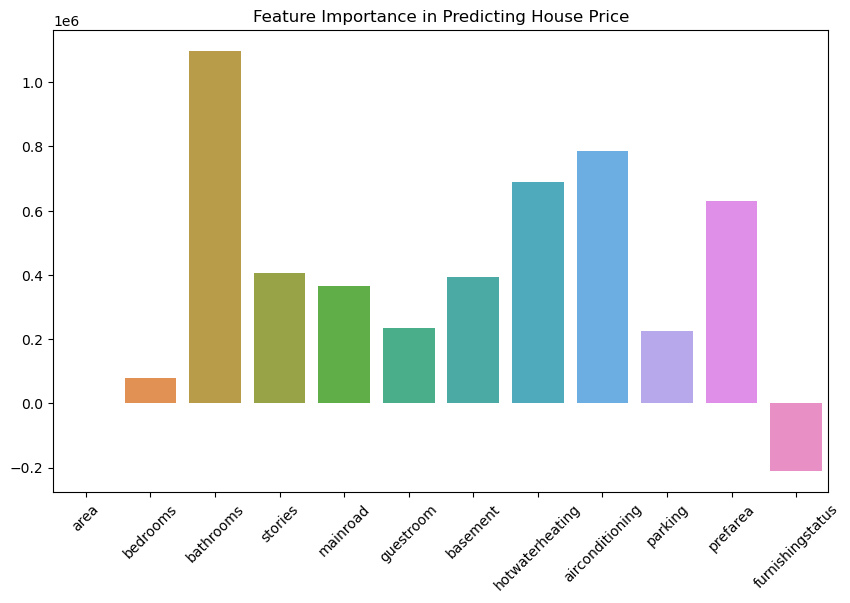

In [16]:
# Feature Importance Visualization
feature_importance = linear_model.coef_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importance)
plt.xticks(rotation=45)
plt.title("Feature Importance in Predicting House Price")
plt.show()